###  Stress Testing the Portfolio

#### Stress testing involves simulating extreme but plausible market scenarios to evaluate how the portfolio would perform under **financial shocks**, such as:

-  A financial crisis (e.g., 2008)
-  A sudden market crash (e.g., -5% to -10% in a day)
-  A sector collapse (e.g., tech or energy stocks tank)
-  Geopolitical events or interest rate shocks

---

####  Why Is Stress Testing Important?

- It helps assess the **resilience of your portfolio** to adverse conditions.
- It reveals **hidden vulnerabilities** not captured by regular risk metrics like VaR or Sharpe Ratio.
- Regulatory frameworks (e.g., Basel III) require financial institutions to run stress tests periodically.

---

####  Common Approaches to Stress Testing

1. **Historical Stress Scenarios**  
   Use actual return data from crisis periods (e.g., COVID crash, 2008, dot-com bubble).

2. **Hypothetical Scenarios**  
   Apply user-defined shocks to simulate a sudden drop in market value, volatility spike, or sector-specific loss.

3. **Factor-Based Models**  
   Link portfolio performance to economic variables (interest rates, inflation, oil prices) and simulate shocks in those variables.

---

####  Example Use Cases:

- What happens if AAPL drops 10% overnight?
- How does your portfolio behave if the entire tech sector drops 7%?
- Can your portfolio recover from a 3-day -12% drawdown?

---

####  Outcome

Stress testing reveals:

- **Maximum potential loss** under certain events
- How long it might take to **recover**
- Whether the **asset allocation** needs to change to reduce risk



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [16]:
df = pd.read_csv("portfolio_daily_returns.csv",index_col='Date', parse_dates=True)
df.columns =['Return']

In [17]:
# Assumeing portifolio consist of AAPL, MSFT, TSLA with equal weights
weights = {'APPL': 1/3, 'MSFT': 1/3, 'TSLA' : 1/3}

In [18]:
returns =df.pct_change().dropna()

In [19]:
# Simulate daily returns for each stock
# This is just a mock/demo technique — a placeholder since we don’t have actual per-stock return data, but still  create something that looks realistic
np.random.seed(0)
dates = df.index
aapl = df['Return'].copy()
msft = df['Return'].copy()
tsla = df['Return'].copy()



In [20]:
# creating dataframe for stres testing
stock_returns = pd.DataFrame({
    'AAPL' : aapl,
    'MSFT' : msft,
    'TSLA' : tsla
}, index=dates)
stock_returns.head()

,AAPL,MSFT,TSLA
Date,,,
2022-01-04,-0.022771,-0.022771,-0.022771
2022-01-05,-0.038198,-0.038198,-0.038198
2022-01-06,-0.015505,-0.015505,-0.015505
2022-01-07,-0.010086,-0.010086,-0.010086
2022-01-10,0.009369,0.009369,0.009369


In [21]:
# Apply -10% AAPL shock
if shock_day in stock_returns.index:
    stock_returns.loc[shock_day, 'AAPL'] -= 0.10
else:
    print(f"Shock day {shock_day} not in index")

In [22]:
# simulating a stress scenario for AAPL - sudden 10%
shock_day = '2023-10-02'
stock_returns.loc[shock_day, 'AAPL'] -= 0.10

In [23]:
# Recalculating portifolio retun
portfolio_returns = (returns*pd.Series(weights)).sum(axis=1)
portfolio_returns_stressed = (stock_returns*pd.Series(weights)).sum(axis=1)
portfolio_returns_stressed.head()
portfolio_returns.head()

Date
2022-01-05    0.0
2022-01-06    0.0
2022-01-07    0.0
2022-01-10    0.0
2022-01-11    0.0
dtype: float64

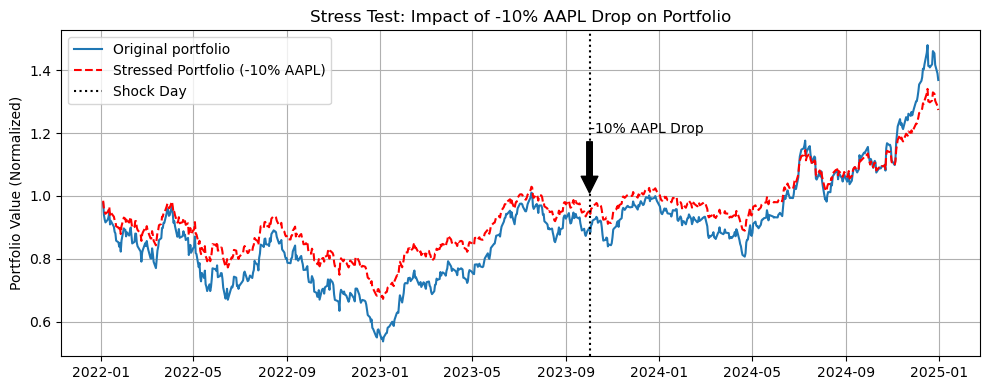

In [24]:
# Ploting before and after shock
plt.figure(figsize=(10,4))
plt.plot((1+df['Return']).cumprod(), label='Original portfolio')
plt.plot((1+portfolio_returns_stressed).cumprod(), label='Stressed Portfolio (-10% AAPL)', linestyle='--', color='red')
plt.annotate('-10% AAPL Drop', xy=(pd.to_datetime(shock_day), 1), 
             xytext=(pd.to_datetime(shock_day), 1.2),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.axvline(pd.to_datetime(shock_day), color='black', linestyle=':', label='Shock Day')
plt.title('Stress Test: Impact of -10% AAPL Drop on Portfolio')
plt.ylabel('Portfolio Value (Normalized)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\amalm\OneDrive\Desktop\finamcial_data_analysis_lerning\project\value_at_risk\Stressed Portfolio (-10% AAPL)', dpi=300, bbox_inches='tight')
plt.show()

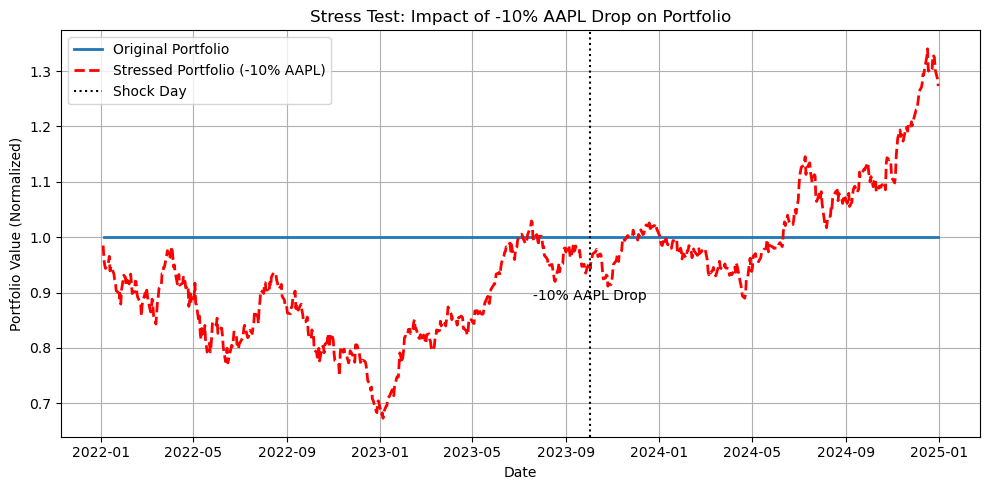

In [25]:
# Cumulative return for plotting
original_cum = (1 + portfolio_returns).cumprod()
stressed_cum = (1 + portfolio_returns_stressed).cumprod()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(original_cum, label='Original Portfolio', linewidth=2)
plt.plot(stressed_cum, label='Stressed Portfolio (-10% AAPL)', linestyle='--', color='red', linewidth=2)
plt.axvline(pd.to_datetime(shock_day), color='black', linestyle=':', label='Shock Day')
plt.text(pd.to_datetime(shock_day), stressed_cum.loc[shock_day]*0.95, '-10% AAPL Drop', color='black', ha='center', va='top')
plt.title('Stress Test: Impact of -10% AAPL Drop on Portfolio')
plt.ylabel('Portfolio Value (Normalized)')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\amalm\OneDrive\Desktop\finamcial_data_analysis_lerning\project\value_at_risk\Stress Test: Impact of -10% AAPL Drop on Portfolio', dpi=300, bbox_inches='tight')
plt.show()


### Stress Testing Analysis

In this simulation, we applied a hypothetical -10% shock to AAPL's return on a chosen date to observe how such a drop would impact our equally weighted portfolio (AAPL, MSFT, TSLA).

- The **blue line** shows the original portfolio's cumulative return.
- The **red dashed line** shows the cumulative return after the shock.
- The **black dotted line** marks the shock date.

We can see that the -10% drop in AAPL caused a visible decline in the portfolio's value. This helps us assess portfolio robustness and prepare for adverse market conditions. It also emphasizes the importance of diversification and risk management.
